# Average Bubble

In [1]:
from bubble_tools_vac import *
from experiment_vac import *


In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({'backend' : 'Qt5Agg'})
plt.rcParams.update({'text.usetex' : True})

plt.rcParams.update({'font.size' : 12.0})
plt.rcParams.update({'axes.titlesize' : 14.0})  # Font size of title
plt.rcParams.update({'axes.titlepad'  : 10.0})
plt.rcParams.update({'axes.labelsize' : 14.0})  # Axes label sizes
plt.rcParams.update({'axes.labelpad'  : 10.0})
plt.rcParams.update({'xtick.labelsize'  : 14.0})
plt.rcParams.update({'ytick.labelsize'  : 14.0})
plt.rcParams.update({'xtick.labelsize'  : 10.0})
plt.rcParams.update({'ytick.labelsize'  : 10.0})

plt.rcParams.update({'axes.spines.left'  : True})
plt.rcParams.update({'axes.spines.right'  : True})
plt.rcParams.update({'axes.spines.top'  : True})
plt.rcParams.update({'axes.spines.bottom'  : True})
plt.rcParams.update({'savefig.format'     : 'pdf'})
plt.rcParams.update({'savefig.bbox'       : 'tight'})
plt.rcParams.update({'savefig.pad_inches' : 0.1})
plt.rcParams.update({'pdf.compression' : 6})
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226'])


In [3]:
pp       = 0
ph0      = phi0List[pp]
lamb     = lambList[pp]
sigmafld = fluct_stdev(lamb, ph0, temp)

kUV = max(klist[klist>0.]); print(kUV)
kIR = min(klist[klist>0.]); print(kIR)

sigmasqreno = np.log((kUV+np.sqrt(kUV**2.+m2(lamb)))/(kIR+np.sqrt(kIR**2.+m2(lamb))))/2./np.pi; print(sigmasqreno)

ddddV = 4.*nu*(1.-4.*(lamb**2.)); print(ddddV)

m2reno = m2(lamb) + 0.5*sigmasqreno*ddddV; print(m2reno)

print(np.sqrt(-m2reno), np.sqrt(m2(lamb)))

4.0652335183637645
0.0039738353063184404
0.7138056121401682
-0.05471999999999999
-0.011849721548155001
0.10885642630619012 0.08763560920082657


In [4]:
get_vels     = False
get_avBubble = False
savef        = False
plots        = False


In [5]:
if True:
    minSim = 0
    maxSim = 3000

    for pp, ph0 in enumerate(phi0List[:1]):
        lamb      = lambList[pp]
        sigmafld  = fluct_stdev(lamb, ph0, temp)

        win         = 300
        critSize    = 30
        threshSize  = phieq + 5.5*sigmafld
        print('Average bubble params:', win, critSize, threshSize)

        if get_vels:
            all_vels = []
            for sim in range(minSim, maxSim):
                path_clean_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
                loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
                if os.path.exists(loc_rest_bub):
                    sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                    all_vels.append(totalvCOM)
            print('Total bubbles included:', len(all_vels))

            if savef:
                np.save(velocities_bubbles_file(nLat, lamb, ph0, temp), np.asarray(all_vels))
                print('Velocities saved.')

        if get_avBubble:
            all_data = []
            for sim in range(minSim, maxSim):      
                path_clean_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
                loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
                if os.path.exists(loc_rest_bub):
                    sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                    all_data.append(np.asarray([real, totalvCOM, sim]))

            print('Total bubbles included:', len(all_data))
            stacks  = stack_bubbles(all_data, plots, win, phieq, threshSize, critSize)
            stacks  = average_stacks(stacks, plots, normal)
            avstack = average_bubble_stacks(stacks)

            if savef:
                np.save(average_bubble_file(nLat, lamb, ph0, temp), avstack)
                print('Average bubble saved.')


Average bubble params: 300 30 5.2176941351701185


In [6]:
# Little script to figure out which averaging gives minimum variance in the field.
if False:
    minSim = 0
    maxSim = 2000

    all_data = []
    for sim in range(minSim, maxSim):      
        path_clean_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
        loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
        if os.path.exists(loc_rest_bub):
            sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
            all_data.append(np.asarray([real, totalvCOM, sim]))


    critSizeList  = [20, 30]
    threshList  = [phieq + 5.5*sigmafld, phieq + 6.*sigmafld, phieq + 6.5*sigmafld]

    for cind, ct in enumerate(critSizeList):
        for tind, tsh in enumerate(threshList):
            critSize   = ct
            threshSize = tsh
            win        = 50

            pp = 0
            ph0       = phi0List[pp]
            lamb      = lambList[pp]
            sigmafld  = fluct_stdev(lamb, ph0, temp)

            try:
                stacks  = stack_bubbles(all_data, plots, win, phieq, threshSize, critSize)
                stacks  = average_stacks(stacks, plots, normal)
                avstack = average_bubble_stacks(stacks)

                np.save(average_bubble_file(nLat, lamb, ph0, temp)+'prelimCS'+str(ct)+'prelimTS'+str(tsh), avstack)
                print('Done', cind, tind)
            except:
                continue

    bubbleList = []
    for cind, ct in enumerate(critSizeList):
        bubbleList.append([])
        for tind, tsh in enumerate(threshList):
            pp = 0
            ph0       = phi0List[pp]
            lamb      = lambList[pp]
            sigmafld  = fluct_stdev(lamb, ph0, temp)

            try:
                bubbleList[-1].append(np.load(average_bubble_file(nLat, lamb, ph0, temp)+'prelimCS'+str(ct)+'prelimTS'+str(tsh)+'.npy'))
            except:
                bubbleList[-1].append(0)   

    tp = 1 # 0 for average, 1 for error
    cp = 0 # 0 - field, 1 - momentum, 2 - gradient

    varmat = np.empty((len(critSizeList), len(threshList)))
    for cind, ct in enumerate(critSizeList):
        for tind, tsh in enumerate(threshList):
            try:
                varmat[cind, tind] = np.mean(bubbleList[cind][tind][tp,cp])
            except:
                varmat[cind, tind] = 0.

    fig, ax = plt.subplots(1,1, figsize = (5,4))
    ext  = [threshList[0], threshList[-1], critSizeList[0], critSizeList[-1]]
    im0  = plt.imshow(varmat, interpolation='none', extent=ext, aspect='auto', origin='lower')
    clb0 = plt.colorbar(im0, ax = ax)

    win = 50
    tp = 1 # 0 for average, 1 for error
    cp = 0 # 0 - field, 1 - momentum, 2 - gradient

    fig, ax = plt.subplots(len(critSizeList), len(threshList), figsize = (20, 10))
    for cind, ct in enumerate(critSizeList):
        for tind, tsh in enumerate(threshList):
            critSize = ct
            threshSize = tsh

            try:
                average_bubble = bubbleList[cind][tind]

                bubble = average_bubble[0,0]
                nT, nN = np.shape(bubble)
                tcen, xcen  = find_nucleation_center2(bubble, phieq, threshSize, critSize)
                tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
                xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
                ext         = [(-xcen)*dx, (nN-xcen)*dx, (-tcen)*dx, (nT-tcen)*dx]
                bubble2plot = average_bubble[tp,cp][tl:tr,xl:xr]

            except:
                average_bubble = np.ones((200, 200))
                bubble2plot = average_bubble

       #     bubble2plot = average_bubble[tp,cp][tl:tr,xl:xr]*100
            im0  = ax[cind,tind].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
            clb0 = plt.colorbar(im0, ax = ax[cind,tind])
            ax[cind,tind].plot(0, 0, color='c', marker='*', ms='5', label='size='+str(ct)+', thresh='+str(format(tsh, '1.2f')))
            ax[cind,tind].legend(title=r'$T=$'+str(temp), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    plt.show()

In [7]:
bubbleList = []
for pp, ph0 in enumerate(phi0List[:1]):
    lamb      = lambList[pp]
    sigmafld  = fluct_stdev(lamb, ph0, temp)

    bubbleList.append(np.load(average_bubble_file(nLat, lamb, ph0, temp)+'.npy'))


No handles with labels found to put in legend.


5.028957636844634
Average bubble params: 200 30 5.028957636844634
297 300


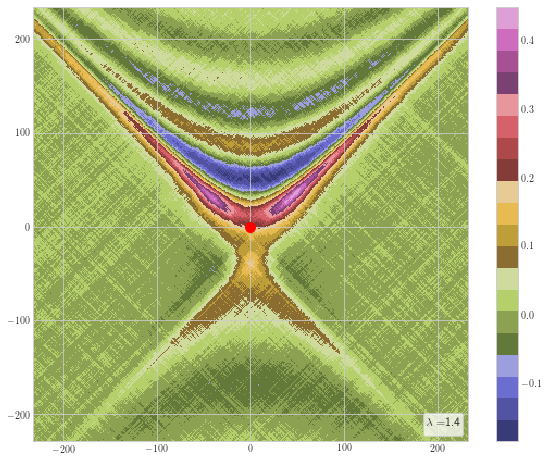

In [50]:
win = 200
tp = 0 # 0 for average, 1 for error
cp = 1 # 0 - field, 1 - momentum, 2 - gradient

fig, ax = plt.subplots(1, len(bubbleList), figsize = (10, 8))
for ii, average_bubble in enumerate(bubbleList):
    lamb = lambList[ii]
    ph0  = phi0List[ii]
    phieq     = np.pi
    sigmafld  = fluct_stdev(lamb, ph0, temp)
    critSize    = 30
    threshSize  = phieq + 5.*sigmafld; print(threshSize)
    print('Average bubble params:', win, critSize, threshSize)

    bubble = average_bubble[0,0]
    nT, nN = np.shape(bubble)
    tcen, xcen  = find_nucleation_center2(bubble, phieq, threshSize, critSize)
    print(tcen, xcen)
    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
    ext         = [(-xcen)*dx, (nN-xcen)*dx, (-tcen)*dx, (nT-tcen)*dx]

    bubble2plot = average_bubble[tp,cp][tl:tr,xl:xr]
    im0  = ax.imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax); plt.plot(0, 0, color='r', marker='o', ms='10')
  #  ax.axhline((indmin-tcen)*dtout, ls=':', color='r')
    ax.legend(title=r'$\lambda=$'+str(lamb), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    plt.show()

No handles with labels found to put in legend.


5.028957636844634
Average bubble params: 100 30 5.028957636844634


/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


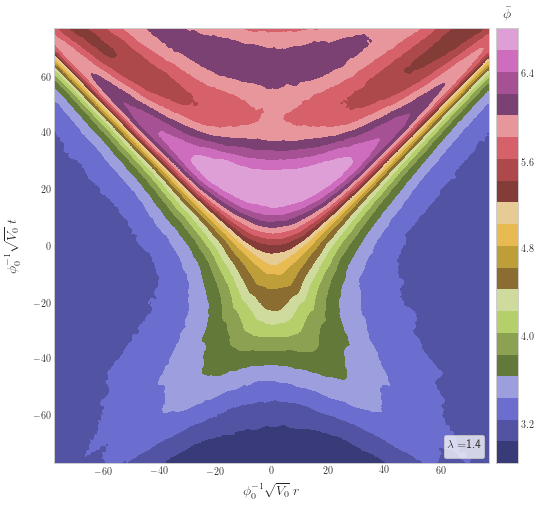

In [51]:
from mpl_toolkits.axes_grid1 import ImageGrid

win = 100
tp = 0 # 0 for average, 1 for error
cp = 0 # 0 - field, 1 - momentum, 2 - gradient
valmin, valmax = phieq, phieq

fig = plt.figure(figsize = (17, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(bubbleList)), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(bubbleList)
for ii, average_bubble in enumerate(bubbleList):
    lamb = lambList[ii]
    ph0  = phi0List[ii]
    phieq     = np.pi
    sigmafld  = fluct_stdev(lamb, ph0, temp)
    critSize    = 30
    threshSize  = phieq + 5.*sigmafld; print(threshSize)
    print('Average bubble params:', win, critSize, threshSize)

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)
    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
    bubble2plot = average_bubble[tp,cp][tl:tr,xl:xr]
    bubble2measure = average_bubble[0,0][tl:tr,xl:xr]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center2(bubble2measure, phieq, threshSize, critSize)
    ext  = np.asarray([(-xcen), (nN-xcen), (-tcen), (nT-tcen)])*dx

    if np.amin(bubble2plot) < valmin: valmin = np.amin(bubble2plot)
    if np.amax(bubble2plot) > valmax: valmax, maxable = np.amax(bubble2plot), ii

    grid[ii].legend(title=r'$\lambda=$'+str(lamb), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    im[ii] = grid[ii].imshow(bubble2plot, interpolation='gaussian', extent=ext, origin='lower', cmap='tab20b')
    cbar = grid[ii].cax.colorbar(im[maxable])
    grid[ii].cax.toggle_label(True)
    grid[ii].cax.set_title(r'$\bar{\phi}$')
    [im[ii].set_clim(vmin=valmin, vmax=valmax) for i in range(len(grid))]
    [grid[ii].tick_params(direction='in', which='both', top=True, right=True) for ii in range(len(grid))]
    [grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$') for ii in range(len(grid))]
    grid[ii].grid(False)
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
plt.savefig('./data/average_vacuum_bubble_comparison.pdf')



No handles with labels found to put in legend.


5.028957636844634
Average bubble params: 100 30 5.028957636844634


/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


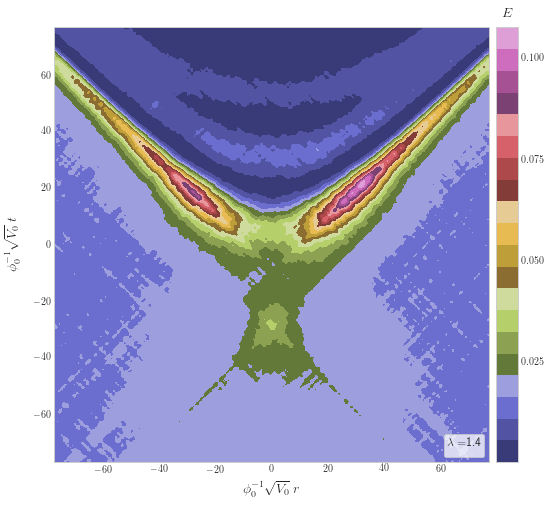

In [52]:
valmin, valmax = 0.05,0.05

fig = plt.figure(figsize = (17, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(bubbleList)), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(bubbleList)
for ii, average_bubble in enumerate(bubbleList):
    lamb = lambList[ii]
    ph0  = phi0List[ii]
    phieq     = np.pi
    sigmafld  = fluct_stdev(lamb, ph0, temp)
    critSize    = 30
    threshSize  = phieq + 5.*sigmafld; print(threshSize)
    print('Average bubble params:', win, critSize, threshSize)

    kinetic   = 0.5*average_bubble[0,1]**2.
    gradient  = 0.5*average_bubble[0,2]**2.
    potential = V(average_bubble[0,0], lamb)
    totEbubble = kinetic + gradient + potential
   # totEbubble = np.log(totEbubble)

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)
    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
    bubble2plot = totEbubble[tl:tr,xl:xr]
    bubble2measure = average_bubble[0,0][tl:tr,xl:xr]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center2(bubble2measure, phieq, threshSize, critSize)
    ext  = np.asarray([(-xcen), (nN-xcen), (-tcen), (nT-tcen)])*dx

    if np.amin(bubble2plot) < valmin: valmin = np.amin(bubble2plot)
    if np.amax(bubble2plot) > valmax: valmax, maxable = np.amax(bubble2plot), ii

    grid[ii].legend(title=r'$\lambda=$'+str(lamb), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    im[ii] = grid[ii].imshow(bubble2plot, interpolation='gaussian', extent=ext, origin='lower', cmap='tab20b')
    cbar = grid[ii].cax.colorbar(im[maxable])
    grid[ii].cax.toggle_label(True)
    grid[ii].cax.set_title(r'$E$')
    im[ii].set_clim(vmin=valmin, vmax=valmax)
    grid[ii].tick_params(direction='in', which='both', top=True, right=True)
    grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    grid[ii].grid(False)
plt.savefig('./data/average_vacuum_bubble_energies_comparison.pdf')

#   ax.axhline(indmin, ls=':', color='r')

In [55]:
# Critical bubble; expectation
eden = -(V(2.*np.pi, lamb)-V(np.pi, lamb))*ph0**2.
phiL = np.linspace(np.pi, 2*np.pi, 1000)
surf = np.trapz(np.sqrt(2.*V(phiL, lamb)), phiL)*ph0
rsph = surf/eden
Esph = 2.*eden*rsph
print('energy density:', eden)
print('surface density:', surf)
print('critical radius:', rsph)
print('total energy', Esph)



energy density: 0.08056819919256618
surface density: 1.0169156580535719
critical radius: 12.621799521955806
total energy 2.0338313161071437


(2, 3, 601, 601)
297 98
Temp =  0.0
timeslice: 277
critical radius: 76.81802421551606
total energy 3.5188166966273235


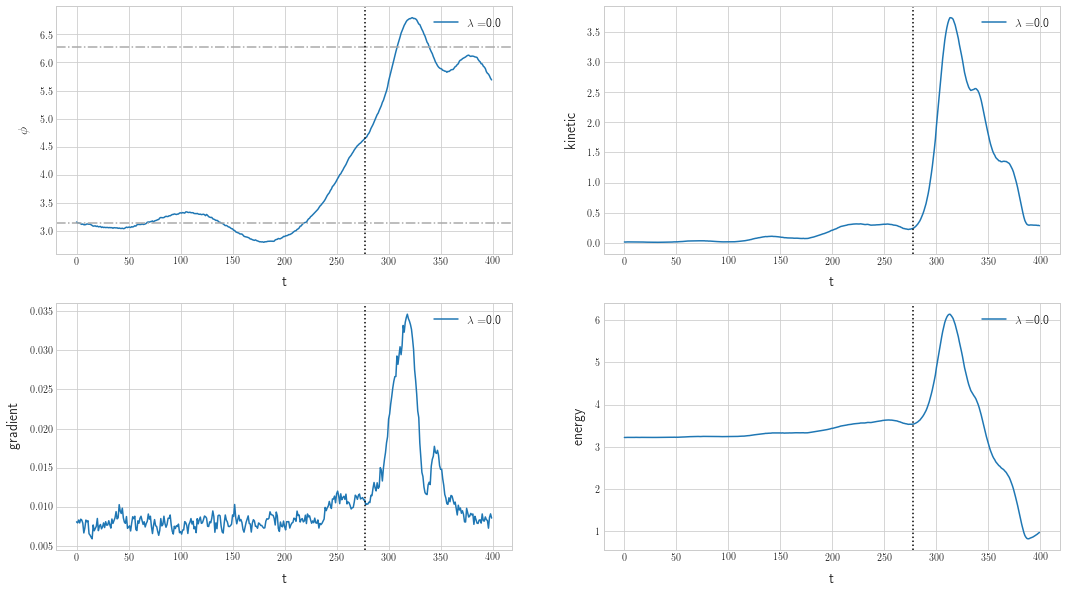

In [56]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))

EcritList = []
for ii, average_bubble in enumerate(bubbleList):
    print(np.shape(average_bubble))

    lamb    = lambList[ii]
    bubbele = average_bubble[0,:,:400, 200:400]

    kinetic  = 0.5*bubbele[1]**2.
    gradient = 0.5*bubbele[2]**2.
    totEbubble = kinetic + gradient + V(bubbele[0], lamb)
    
    bubbleCoords = bubbele[0]>phieq

    nT,nN = np.shape(totEbubble)
    t0,x0 = find_nucleation_center(bubbele[0], phieq, threshSize, critSize); print(t0,x0)
    phiprof = bubbele[0,:,x0]
    ax[0,0].set_ylabel(r'$\phi$')
    ax[0,0].plot(phiprof, label=r'$\lambda=$'+str(temp))
    ax[0,0].axhline(phieq, ls='-.', color='darkgray')
    ax[0,0].axhline(2.*np.pi, ls='-.', color='darkgray')

    momprof = np.sum(kinetic, axis=1)
    ax[0,1].plot(momprof, label=r'$\lambda=$'+str(temp))
    ax[0,1].set_ylabel('kinetic')

    gradprof = np.sum(gradient, axis=1)
    ax[1,0].plot(gradprof, label=r'$\lambda=$'+str(temp))
    ax[1,0].set_ylabel('gradient')

    enprof = np.sum(totEbubble, axis=1)
    ax[1,1].plot(enprof, label=r'$\lambda=$'+str(temp))
    ax[1,1].set_ylabel('energy')

    indmin   = np.argmin(momprof[250:300])
    indmin  += 254
    slice    = bubbele[0,indmin]*bubbleCoords[indmin]
    momslice = bubbele[1,indmin]*bubbleCoords[indmin]
    enslice  = totEbubble[indmin]*bubbleCoords[indmin]
    EcritList.append(np.asarray([slice, momslice, enslice]))

    Remp = np.count_nonzero(slice)/2.
    Eemp = np.sum(enslice)

    print('Temp = ', temp)
    print('timeslice:', indmin)
    print('critical radius:', Remp*dx)
    print('total energy', Eemp)

for aa, axx in enumerate(ax.flatten()):
    axx.axvline(indmin, color='k', ls=':')
    axx.set_xlabel('t')
    axx.legend()
plt.show()

1024 1024
1024 1024


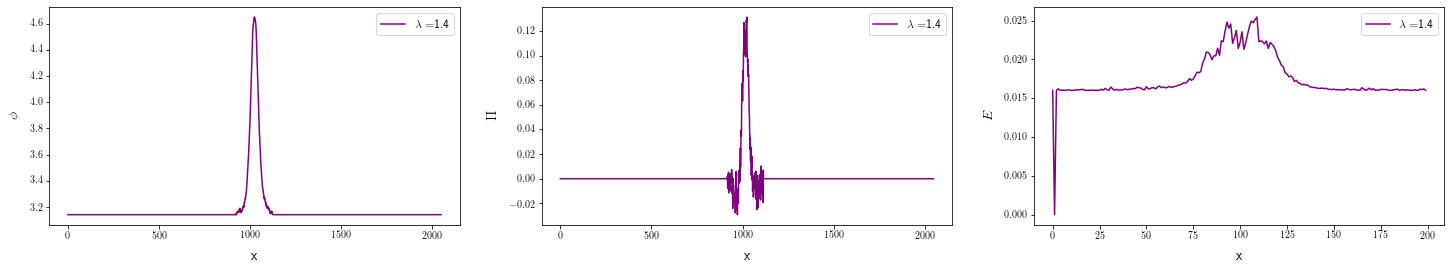

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (25, 4))
cols = cycle(['purple', 'forestgreen', 'orange'])
for pp, ph0 in enumerate(phi0List[:1]):
    lamb      = lambList[pp]
    sigmafld  = fluct_stdev(lamb, ph0, temp)

    col = next(cols)
    slice, momslice, enslice = EcritList[pp]

    slice = np.concatenate((slice, np.zeros(nLat-len(slice))), axis=0)
    slice = np.roll(slice, nLat-int(-np.abs(nLat/2. - np.argmax(slice))))
    slice[slice==0.] = phieq
    print(np.argmax(slice), nLat//2)

    momslice = np.concatenate((momslice, np.zeros(nLat-len(momslice))), axis=0)
    momslice = np.roll(momslice, nLat-int(-np.abs(nLat/2. - np.argmax(momslice))))
    print(np.argmax(momslice), nLat//2)

    ax[0].plot(slice, label=r'$\lambda=$'+str(lamb), ls='-', color=col)
    ax[0].set_ylabel(r'$\phi$')
    ax[1].plot(momslice, label=r'$\lambda=$'+str(lamb), ls='-', color=col)
    ax[1].set_ylabel(r'$\Pi$')
    ax[2].plot(enslice, label=r'$\lambda=$'+str(lamb), ls='-', color=col)
    ax[2].set_ylabel(r'$E$')

for axx in ax.flatten():
    axx.set_xlabel('x')
    axx.legend()
plt.show()

In [14]:
crit_soln_f90 = '(/'
for ind, iii in enumerate(slice):
    crit_soln_f90 = crit_soln_f90 + str(iii)
    if ind != len(slice)-1:
        crit_soln_f90 = crit_soln_f90 + ', '
crit_soln_f90 += '/)'
#print(crit_soln_f90)

In [15]:
crit_soln_f90 = '(/'
for ind, iii in enumerate(momslice):
    crit_soln_f90 = crit_soln_f90 + str(iii)
    if ind != len(momslice)-1:
        crit_soln_f90 = crit_soln_f90 + ', '
crit_soln_f90 += '/)'
#print(crit_soln_f90)

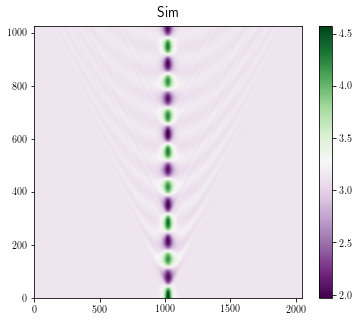

In [16]:
path_sim = '/gpfs/dpirvu/velocity_comparison/critical_'+batch_params(nLat,lamb,ph0,temp) + '_sim0_fields.dat'
crit_real = extract_data(nLat, path_sim)
win = nLat//2
critical2plot = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(critical2plot)

simple_imshow(critical2plot[0], [0,nN,0,nT])


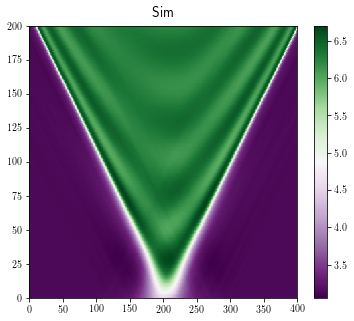

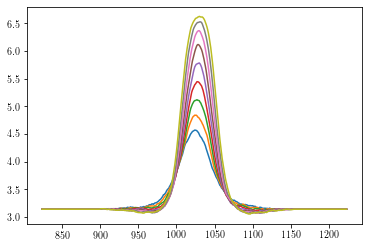

In [17]:
path_sim = '/gpfs/dpirvu/velocity_comparison/critical_with_momentum_'+batch_params(nLat,lamb,ph0,temp) + '_sim0_fields.dat'
crit_real = extract_data(nLat, path_sim)
win = 200
critical2plot = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(critical2plot)

simple_imshow(critical2plot[0], [0,nN,0,nT])

for tt in range(0, 25, 3):
    plt.plot(np.arange(nLat//2-win, nLat//2+win), crit_real[0, tt, nLat//2-win:nLat//2+win], label='t='+str(tt))
plt.show()

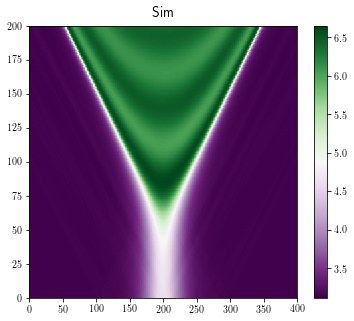

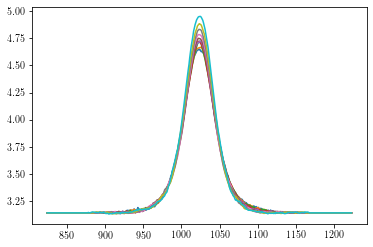

In [18]:
path_sim = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,ph0,temp) + '_sim0_fields.dat'
crit_real = extract_data(nLat, path_sim)
win = 200
critical2plot = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(critical2plot)

simple_imshow(critical2plot[0], [0,nN,0,nT])

for tt in range(0, 50, 5):
    plt.plot(np.arange(nLat//2-win, nLat//2+win), crit_real[0, tt, nLat//2-win:nLat//2+win], label='t='+str(tt))
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


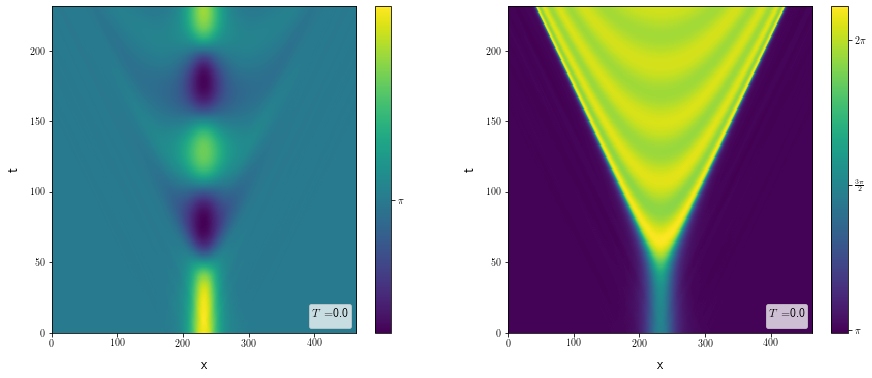

In [19]:
if True:
    # under current assumptions in this notebook, the critical slice for the lambda=1.4 bubble is at t=273
    # but the first slice to actually evolve into bubble on its own is at t=277
    # so we name 'actual critical bubble' t=276
    # we name 'supercritical bubble' t=277
    # note that the bubble at t=273, which has minimal momentum as found above, while it doesn't decay on its own, \
    #it does decay when we add average momentum as initial conditions. we name this one 'critical with momentum'
    path_sim = '/gpfs/dpirvu/velocity_comparison/actually_critical_'+batch_params(nLat,lamb,ph0,temp) + '_sim0_fields.dat'
    subcrit_real = extract_data(nLat, path_sim)
    win = 300
    subcritical2plot = subcrit_real[0,:win,nLat//2-win:nLat//2+win]
    nT, nN = np.shape(subcritical2plot)
    exts1 = [0*dx,nN*dx,0*dx,nT*dx]

    # slice t=58 momentum is 0
    path_sim = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,ph0,temp) + '_sim0_fields.dat'
    crit_real = extract_data(nLat, path_sim)
    win = 300
    critical2plot = crit_real[0,:win,nLat//2-win:nLat//2+win]
    nT, nN = np.shape(critical2plot)
    exts2 = [0*dx,nN*dx,0*dx,nT*dx]

    fig, ax = plt.subplots(1, 2, figsize = (15, 6))
    cmp = 'tab20b'
    im0 = ax[0].imshow(subcritical2plot, aspect='auto', interpolation='none', extent=exts1, origin='lower')#, cmap=cmp)
    clb0 = plt.colorbar(im0, ax = ax[0])
    clb0.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
    clb0.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
    clb0.update_ticks()

    im1 = ax[1].imshow(critical2plot, aspect='auto', interpolation='none', extent=exts2, origin='lower')#, cmap=cmp)
    clb1 = plt.colorbar(im1, ax = ax[1])
    clb1.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
    clb1.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
    clb1.update_ticks()

    for aa in ax:
        aa.grid(False)
        aa.legend(title=r'$T=$'+str(temp), loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[0].set_xlabel('x'); ax[0].set_ylabel('t')
    ax[1].set_xlabel('x'); ax[1].set_ylabel('t')
    plt.savefig('./data/critical_and_subcritical_bubble.pdf')
    plt.show()

Number of bubbles, temperature: 1499 0.0


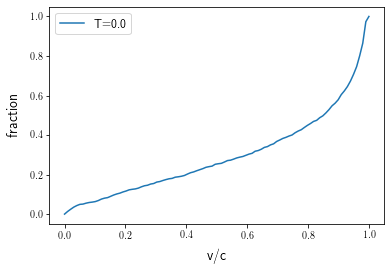

In [20]:
for pp, ph0 in enumerate(phi0List[:1]):
    lamb      = lambList[pp]
    sigmafld  = fluct_stdev(lamb, ph0, temp)

    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')
    print('Number of bubbles, temperature:', len(all_vels), temp)
    all_vels = np.abs(all_vels)
 #   vlist = np.linspace(-1,1,100)
    vlist = np.linspace(0.,1,100)
    fraction = [len(all_vels[all_vels<ii])/len(all_vels) for ii in vlist]

    yerr = np.std(all_vels)
#    plt.fill_between(vlist, fraction - yerr, fraction + yerr, color='gray', alpha=0.2)
    plt.plot(vlist, fraction, label='T='+str(temp))
plt.xlabel('v/c'); plt.ylabel('fraction')
plt.legend(); plt.show()



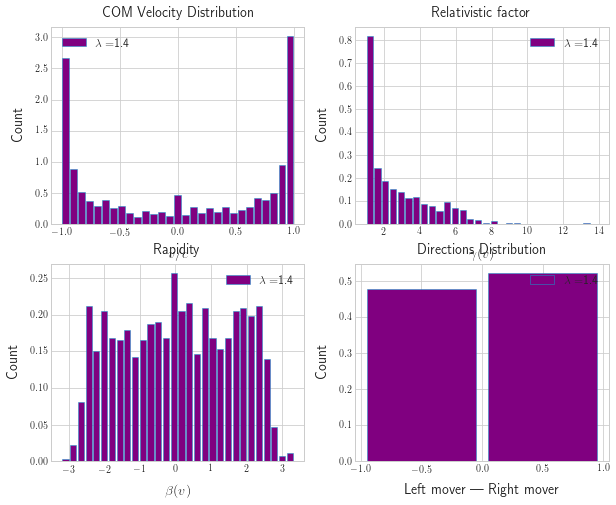

In [18]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
plt.style.use('seaborn-whitegrid') # nice and clean grid
cols = cycle(['purple', 'forestgreen', 'orange'])
for pp, ph0 in enumerate(phi0List[:1]):
    lamb      = lambList[pp]
    sigmafld  = fluct_stdev(lamb, ph0, temp)

    col = next(cols)
    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')
    xlist     = np.linspace(-1.,1.,1000)
    mu        = 0.
    
    nB = 30
    slots = np.linspace(-1., 1., nB)
    ax[0,0].hist(all_vels, bins=slots, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, color=col, label=r'$\lambda=$'+str(lamb))
    ax[0,0].set_title('COM Velocity Distribution')
    ax[0,0].set_xlabel(r'$v/c$')

    ax[0,1].hist(gamma(all_vels), bins=nB, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, alpha=1-pp*0.2, color=col, label=r'$\lambda=$'+str(lamb))
    ax[0,1].set_title('Relativistic factor')
    ax[0,1].set_xlabel(r'$\gamma(v)$')

    ax[1,0].hist(rapidity(all_vels), bins=nB, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, alpha=1-pp*0.2, color=col, label=r'$\lambda=$'+str(lamb))
    ax[1,0].set_title('Rapidity')
    ax[1,0].set_xlabel(r'$\beta(v)$')

    ax[1,1].hist(np.sign(all_vels), bins=2, density=True, rwidth=0.9,  edgecolor='#169acf', linewidth=0.5, alpha=1-pp*0.2, color=col, label=r'$\lambda=$'+str(lamb))
    ax[1,1].set_title('Directions Distribution')
    ax[1,1].set_xlabel(r' Left mover | Right mover ')

    for axx in ax.flatten():
        axx.set_ylabel('Count')
        axx.legend()
plt.savefig('./data/histograms_vels_lamb.pdf')
plt.show()


7 [205 229 253 277 301 325 349]
233.1562142018678
233.1562142018678


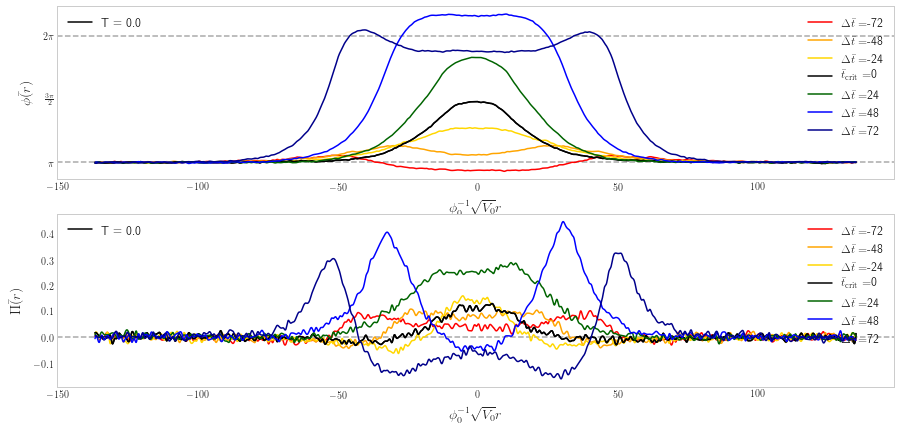

In [20]:
# Compare profiles
timesList = np.arange(indmin-18*4, indmin+24*4, 6*4).tolist()
timesList = np.sort(np.asarray(timesList))
print(len(timesList), timesList)

fig, ax = plt.subplots(2, 1, figsize = (15, 7))
ax[1].axhline(0., color='darkgray', ls='--')
ax[0].axhline(phieq, color='darkgray', ls='--')
ax[0].axhline(2.*np.pi, color='darkgray', ls='--') 
ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

for coln in [0,1]:
    bool = True
    lss = cycle(['-', '-.', ':'])
    secondary_lines, secondary_labels = [], []
    for b, bub in enumerate(bubbleList):
        lamb      = lambList[0]
        sigmafld  = fluct_stdev(lamb, ph0, temp)
        
        #xcen = 0
        xcen = (np.argmax(bub[0,0,indmin,:])+1)*dx; print(xcen)

        cols = cycle(['red', 'orange', 'gold', 'darkgreen', 'blue', 'darkblue', 'purple', 'violet'])
        ls = next(lss)
        for tt in timesList:
            xmin   = 125
            data   = bub[0,coln,tt,xmin:-xmin+1]
            xlist  = np.linspace(xmin, len(data)+xmin, len(data))*dx
            xlist  = xlist - xcen

            spline  = scp.interpolate.splrep(xlist, data)
            r       = np.linspace(xlist[0], xlist[-1], 2000)
            profile = scp.interpolate.splev(r, spline)

            if tt == indmin:
                col = 'k'
                secondary_labels.append('T = '+str(temp))
                l1, = ax[coln].plot(r, profile, color=col, ls=ls)
                secondary_lines.append(l1)
            else:
                col = next(cols)
            if bool:
                ax[coln].plot(r, profile, color=col, ls=ls, label=(r'$\Delta \bar{t} = $'+str(tt-indmin) if tt!=indmin else r'$\bar{t}_{\rm crit} = $'+str(tt-indmin)))
            else:
                ax[coln].plot(r, profile, color=col, ls=ls)

        bool = False
    ax[coln].add_artist(ax[coln].legend(secondary_lines, secondary_labels, loc=2))
    
ax[0].set_ylabel(r'$\bar{\phi(r)}$')
ax[1].set_ylabel(r'$\bar{\Pi(r)}$')
for axx in ax.flatten():
    axx.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} r$')
    axx.legend()
    axx.grid(False)
plt.savefig('./data/profile_comparison_thermal.pdf')
plt.show()


In [21]:
def ax_opts(ax):
    for axx in ax:
        axx[0].axhline(phieq, color='darkgray', ls='--')
        axx[0].axhline(2.*np.pi, color='darkgray', ls='--') 
        axx[1].axvline(phieq, color='darkgray', ls='--')
        axx[1].axvline(2.*np.pi, color='darkgray', ls='--') 
        axx[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        axx[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
        axx[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        axx[1].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
        axx[0].set_xlabel(r'$r$')
        axx[0].set_ylabel(r'$\phi$')
        axx[1].set_ylabel(r'$r$')
        axx[1].set_xlabel(r'$\phi$')
    for axx in ax.flatten():
        axx.legend(); axx.grid()
    return ax

# Bounce Reconstruction

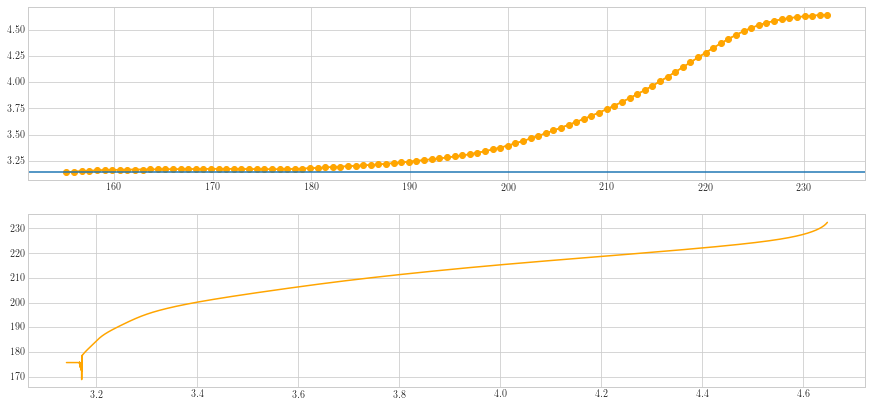

In [28]:
fig, ax = plt.subplots(2, len(bubbleList), figsize = (15, 7))
cols = cycle(['orange', 'darkgreen', 'violet'])
fvrecoList, fvderphiList = [], []
for pp, ph0 in enumerate(phi0List[:1]):
    lamb     = lambList[pp]
    sigmafld = fluct_stdev(lamb, ph0, temp)
    col = next(cols)

    data   = bubbleList[pp][0,0,indmin,:]
    tstop  = np.argmax(data)
    tstart = tstop-1-np.argmin((data[:tstop]*(data[:tstop]>phieq))[::-1])
    data   = data[tstart:tstop+1]
    data   = gaussian_filter(data, 3, mode='nearest')
    xlist  = np.linspace(tstart, tstop, len(data))*dx

    spline     = scp.interpolate.splrep(xlist, data)    # interpolate mean field
    der1spline = scp.interpolate.splder(spline, n=1)    # take tangent to this curve
    der2spline = scp.interpolate.splder(spline, n=2)    # take tangent to tangent curve

    r        = np.linspace(xlist[0], xlist[-1], 2000)
    phifv    = scp.interpolate.splev(r, spline)
    dphidr   = scp.interpolate.splev(r, der1spline)
    ddphiddr = scp.interpolate.splev(r, der2spline)
    fvderphiList.append(np.asarray([r, phifv, dphidr, ddphiddr]))

    # invert \phi(r) into r(\phi)
    rinv = np.zeros(phifv.shape)
    profile = intp.interp1d(r, phifv, kind='linear')
    diff = lambda x, a: (profile(x) - a)**2.
    for idx, x_value in enumerate(phifv):
        res = sco.minimize_scalar(diff, args=(x_value), bounds=(min(r), max(r)), method='Bounded')
        rinv[idx] = res.x

    # integrate product of derivatives above to get potential function of r
    # equation of motion
    dVdr        = scp.interpolate.splrep(r, dphidr*ddphiddr + dphidr**2./(r))
    #dVdr        = scp.interpolate.splrep(r, dphidr*ddphiddr)
    Vofrofphi   = scp.interpolate.splev(rinv, scp.interpolate.splantider(dVdr, n=1))
    fvrecoList.append(Vofrofphi)

    ax[0].plot(xlist, data, color=col, marker='o')
    ax[0].plot(r,     phifv, color=col, label='T='+str(temp))
    ax[1].plot(phifv, rinv, color=col, label='T='+str(temp))

ax[0].axhline(phieq)
#ax = ax_opts(ax)
plt.show()

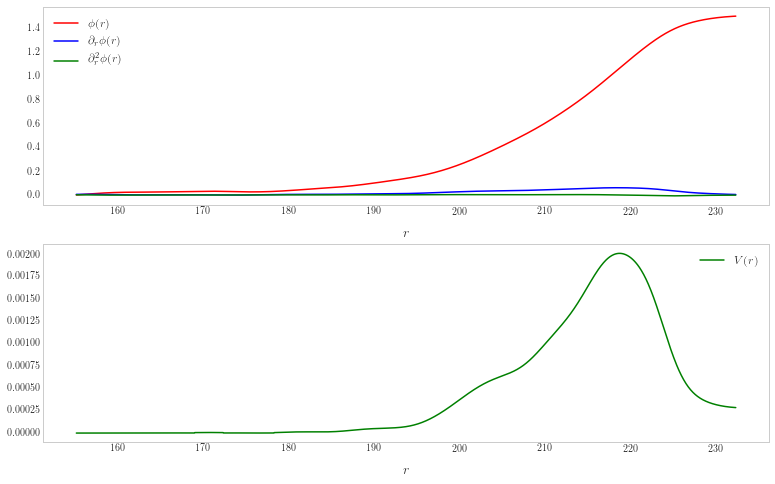

In [29]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
cols = cycle(['orange', 'darkgreen', 'violet'])
lls = cycle(['-', '-.', ':'])
for ii, lists in enumerate(fvderphiList):
    col = next(cols)
    lss = next(lls)
    r, phifv, dphidr, ddphiddr = lists
    Vofrofphi = fvrecoList[ii]
    lamb = lambList[ii]
    ph0  = phi0List[ii]

    ax[0].plot(r, phifv-phieq, 'r', ls=lss, label=(f'$\phi(r)$' if ii==0 else None))
    ax[0].plot(r, dphidr     , 'b', ls=lss, label=(f'$\partial_r \phi(r)$' if ii==0 else None))
    ax[0].plot(r, ddphiddr   , 'g', ls=lss, label=(f'$\partial_r^2 \phi(r)$' if ii==0 else None))
    ax[1].plot(r, Vofrofphi  , 'g', ls=lss, label=(f'$V(r)$' if ii==0 else None))

for axx in ax: axx.set_xlabel(r'$r$'); axx.legend(); axx.grid()
plt.show()


# The Roll 

(2, 3, 601, 601)


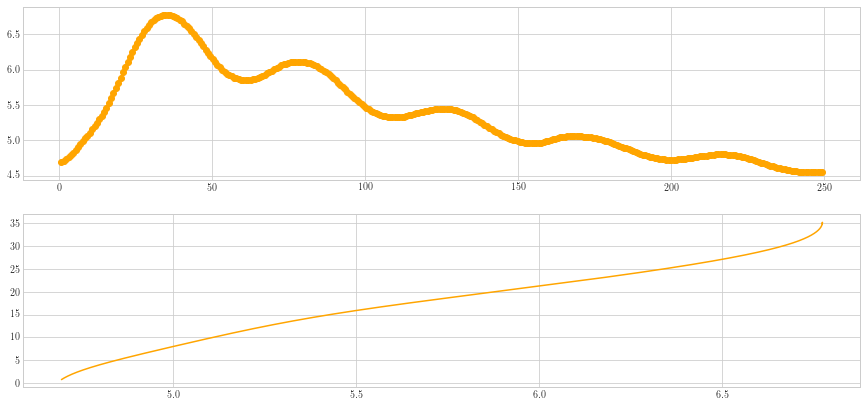

In [30]:
fig, ax = plt.subplots(2, len(bubbleList), figsize = (15, 7))
cols = cycle(['orange', 'darkgreen', 'violet'])
rollrecoList, rollderphiList = [], []
for pp, ph0 in enumerate(phi0List[:1]):
    lamb      = lambList[pp]
    sigmafld  = fluct_stdev(lamb, ph0, temp)
    col = next(cols)

    print(np.shape(bubbleList[pp]))
    
    t0,x0 = find_nucleation_center(bubbleList[pp][0,0], phieq, threshSize, critSize)
    data  = bubbleList[pp][0,0]

    data  = data[indmin+1:, x0] # 0-average; 0-field; timeslices, spaceslices
    data  = gaussian_filter(data, 3, mode='nearest')
    tlist = np.linspace(1, len(data), len(data))*dtout #/np.sqrt(2)
    ax[0].plot(tlist, data, color=col, marker='o', ls='None')

    tstop = np.argmax(data)
    data  = data[:tstop+1]
    tlist = tlist[:tstop+1]

    spline     = scp.interpolate.splrep(tlist, data)    # interpolate mean field
    der1spline = scp.interpolate.splder(spline, n=1)    # take tangent to this curve
    der2spline = scp.interpolate.splder(spline, n=2)    # take tangent to tangent curve

    ts       = np.linspace(tlist[0], tlist[-1], 1000)
    phiroll  = scp.interpolate.splev(ts, spline)
    dphidr   = scp.interpolate.splev(ts, der1spline)
    ddphiddr = scp.interpolate.splev(ts, der2spline)
    rollderphiList.append(np.asarray([ts, phiroll, dphidr, ddphiddr]))

    # invert \phi(r) into r(\phi)
    tinv = np.zeros(phiroll.shape)
    profile = intp.interp1d(ts, phiroll, kind='linear')
    diff2 = lambda x, a: (profile(x) - a)**2.
    for idx, x_value in enumerate(phiroll):
        res = sco.minimize_scalar(diff2, args=(x_value), bounds=(min(ts), max(ts)), method='Bounded')
        tinv[idx] = res.x

    # integrate product of derivatives above to get potential function of ts
    # equation of motion
    dVdr        = scp.interpolate.splrep(ts, -dphidr*ddphiddr-dphidr**2./(ts))
    Vofrofphi   = scp.interpolate.splev(tinv, scp.interpolate.splantider(dVdr, n=1))
    rollrecoList.append(Vofrofphi)

    ax[0].plot(ts     , phiroll, color=col, label='T='+str(temp))
    ax[1].plot(phiroll, tinv   , color=col, label='T='+str(temp))

#ax = ax_opts(ax)
plt.show()


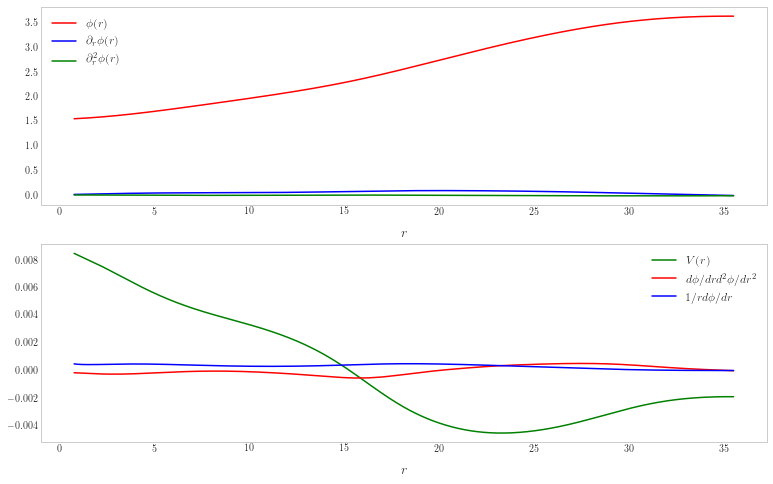

In [31]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
cols = cycle(['orange', 'darkgreen', 'violet'])
lls = cycle(['-', '-.', ':'])
for ii, lists in enumerate(rollderphiList):
    col = next(cols)
    lss = next(lls)
    ts, phiroll, dphidr, ddphiddr = lists
    Vofrofphi = rollrecoList[ii]
    lamb = lambList[ii]
    ph0  = phi0List[ii]

    ax[0].plot(ts, phiroll-phieq               , 'r', ls=lss, label=(f'$\phi(r)$' if ii==0 else None))
    ax[0].plot(ts, dphidr                      , 'b', ls=lss, label=(f'$\partial_r \phi(r)$' if ii==0 else None))
    ax[0].plot(ts, ddphiddr                    , 'g', ls=lss, label=(f'$\partial_r^2 \phi(r)$' if ii==0 else None))
    ax[1].plot(ts, Vofrofphi-np.mean(Vofrofphi), 'g', ls=lss, label=(f'$V(r)$' if ii==0 else None))
    ax[1].plot(ts, -dphidr*ddphiddr            , 'r', ls=lss, label=(f'$d\phi/drd^2\phi/dr^2$' if ii==0 else None))
    ax[1].plot(ts, dphidr**2./ts               , 'b', ls=lss, label=(f'$1/r d\phi/dr$' if ii==0 else None))

for axx in ax: axx.set_xlabel(r'$r$'); axx.legend(); axx.grid()
plt.show()


# Full reconstruction

In [32]:
fullRec = []
fullRec.append(np.asarray([np.concatenate((phifv, phiroll)), np.concatenate((fvrecoList[0], rollrecoList[0]))+V(phieq, lambList[0])]))
fullRec.append(np.asarray([np.concatenate((phifv, phiroll)), np.concatenate((V(phifv, lamb),V(phiroll, lamb)))]))

lambda = 1.4 , fit params: 1.3186073488586558 0.006709864024171306 1.4049497225955252 , $m2(\lambda) = $ 0.004958490789214211
lambda = 1.4 , fit params: 1.4 0.008 1.0 , $m2(\lambda) = $ 0.007682388650847603


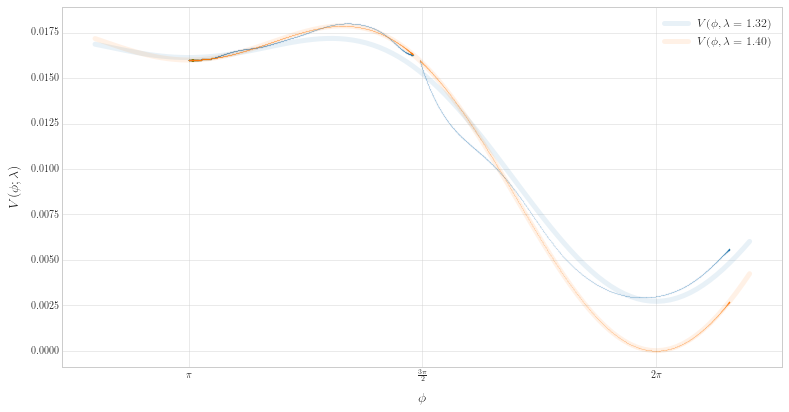

In [33]:
def fit_to_V(x, lam, V0, a):
    return (-np.cos(x) + 0.5*lam**2. * np.sin(x)**2. + a) * V0

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
extphi = np.linspace(phieq*0.8, 2.*np.pi*1.1, 100)
for j, (xss, curve) in enumerate(fullRec):
    col = next(colors)
    lamb = lambList[0]

    plt.plot(xss, curve, color=col, ls='None', marker='o', ms=0.05)

    popt, _ = scp.optimize.curve_fit(fit_to_V, xss, curve)
    plt.plot(extphi, fit_to_V(extphi, *popt), color=col, label=f'$V(\phi, \lambda=%5.2f)$'%(popt[0]), linewidth=5, alpha=0.1)

    spline    = scp.interpolate.splrep(extphi, fit_to_V(extphi, *popt))
    seconder  = scp.interpolate.splev(phieq, scp.interpolate.splder(spline, n=2))
    print('lambda =', lamb, ', fit params:', *popt, r', $m2(\lambda) = $', seconder)

plt.legend()
plt.grid(alpha=0.5)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi;\lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
#plt.margins(0,0)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.savefig('./data/reconstructed_potential.pdf', bbox_inches='tight')
plt.show()